# Nobel Prize Winners: Exploratory Data Analysis

__Importing libraries__

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Preliminary Step

In [2]:
# read csv file to dafarame
df = pd.read_csv('datasets/nobel.csv')
# display 5 data points on top
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


Let's see what type of data in each column.

In [3]:
# display column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [4]:
# how many object and int data dtypes
df.dtypes.value_counts()

object    16
int64      2
dtype: int64

This dataset has 18 columns, with 2 integer column and 16 object column (most likely string object). Before proceeding to the next step, it's a better practice to convert a particular data type into a right and meaningful data type. So we have change the data type for column birth_date and death_date to datetime.

In [0]:
datetime_columns = ['birth_date', 'death_date']
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col])

In [6]:
df[datetime_columns].dtypes

birth_date    datetime64[ns]
death_date    datetime64[ns]
dtype: object

If we look back to the result we have when ran df.info(), we get column for data type and column for how many non-null values in each column. Now, we have to look further about these null values, then decide what we have to do with them.

In [7]:
print('How many columns with null values?', df.isnull().any().sum())
print('What those columns are?\n',  df.isnull().any(), sep='')

How many columns with null values? 11
What those columns are?
year                    False
category                False
prize                   False
motivation               True
prize_share             False
laureate_id             False
laureate_type           False
full_name               False
birth_date               True
birth_city               True
birth_country            True
sex                      True
organization_name        True
organization_city        True
organization_country     True
death_date               True
death_city               True
death_country            True
dtype: bool


11 out of 18 columns we have are filled with null values. Note that the missing values we have probably came from human-errors or plain missing data due to lack of information about particular nobel laurates. Now, we will look to how many missing values are present in each column.

In [8]:
# how many null values (denoted as NaN) present in each column
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

We have 335 null values in column death_city (as the column with most missing values). How about the percentage of missing values.

In [9]:
# how many null values (denoted as NaN) present in each column -- Normalized
df.isnull().mean()

year                    0.000000
category                0.000000
prize                   0.000000
motivation              0.096597
prize_share             0.000000
laureate_id             0.000000
laureate_type           0.000000
full_name               0.000000
birth_date              0.030735
birth_city              0.030735
birth_country           0.028540
sex                     0.028540
organization_name       0.270033
organization_city       0.267838
organization_country    0.267838
death_date              0.349067
death_city              0.367728
death_country           0.361142
dtype: float64

The series object above shows us that we have 6 columns with missing values greater than 25%. But since this dataset is about an individual who won nobel prize, so there is nothing we can do to impute the missing values. Then we will just left the missing values as they are. As a final step of considering missing values, we will look at some simple bar plot which shows us about missing values count and percentage.

In [0]:
count = df.isnull().sum().sort_values(ascending=False)
fraction = df.isnull().mean().sort_values(ascending=False)

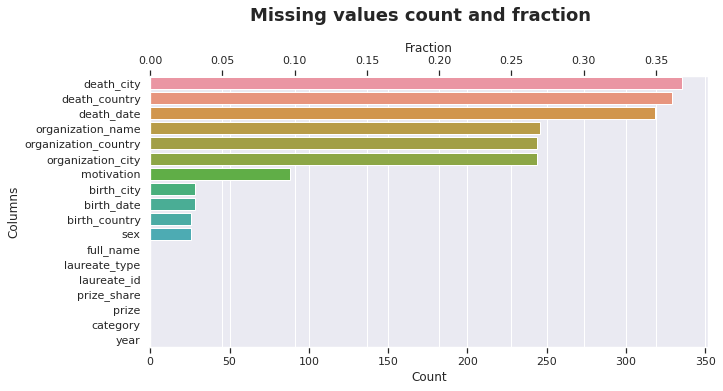

In [11]:
fig, ax_count = plt.subplots(figsize=[10, 5])
sns.barplot(x=count.values, y=count.index)
ax_count.set_xlabel('Count')
ax_count.set_ylabel('Columns')
ax_fraction = ax_count.twiny()
sns.barplot(x=fraction.values, y=fraction.index)
ax_fraction.set_xlabel('Fraction')
fig.suptitle('Missing values count and fraction', y=1.07, fontweight='semibold', fontsize=18);

Now, we can better understand the data. As we validate from numeric representation before this, column 'death_city' is the column with most missing values, 'death_country' on the second place, 'death_date' on the third place, and so on.

---

## Univariate Analysis

In this section, we will explore each important columns and do the corresponding univariate analysis.

### year

Let's see the head (top 5) and tail (bottom 5) of this column

In [12]:
df['year'].head()

0    1901
1    1901
2    1901
3    1901
4    1901
Name: year, dtype: int64

In [13]:
df['year'].tail()

906    2016
907    2016
908    2016
909    2016
910    2016
Name: year, dtype: int64

In [0]:
year_count = df['year'].value_counts().sort_index()

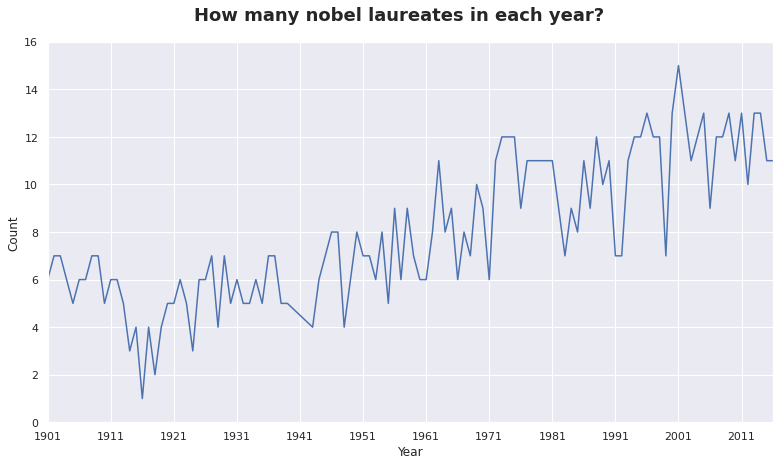

In [15]:
fig, ax_count = plt.subplots(figsize=[13, 7])
sns.lineplot(x=year_count.index, y=year_count.values, ax=ax_count)
ax_count.set_xlim(year_count.index.min(), year_count.index.max())
ax_count.set_xticks(np.arange(year_count.index.min(), year_count.index.max(), 10))
ax_count.set_ylim(0, 15)
ax_count.set_yticks(np.arange(0, 17, 2))
ax_count.set_xlabel('Year')
ax_count.set_ylabel('Count')
ax_count.margins(0.2)
fig.suptitle('How many nobel laureates in each year?', fontweight='bold', fontsize=18, y=0.95);

When we look at the plot above, there are many fluctuations. Then we also know that there is a minimum value between 1910 and 1920. But which year it is?

In [16]:
# display the 5 smallest count in year column
year_count.nsmallest(5)

1916    1
1918    2
1914    3
1924    3
1915    4
Name: year, dtype: int64

In [17]:
# display the 5 largest count in year column
year_count.nlargest(5)

2001    15
1996    13
2000    13
2002    13
2005    13
Name: year, dtype: int64

In here, we know that in 1916 there is only one nobel laureate, two nobel laureates in 1918, three nobel laurates in 1914 and 1924, and four nobel laureates in 1915. So between 1910-1920, there is a decreasing pattern in our plot, and if we open the history book, we know that in this period the world war 1 was raging. Especially, between Jul 28, 1914 – Nov 11, 1918. Then we have 15 nobel laureates in 2001.

In [18]:
# compute what is the average of nobel laureates in each decade
decade_count = year_count.groupby(by=lambda x: np.floor(x / 10)).mean()
decade_count.index = np.arange(1900, 2020, 10)
decade_count

1900     6.333333
1910     4.000000
1920     5.400000
1930     5.600000
1940     6.142857
1950     7.200000
1960     7.900000
1970    10.400000
1980     9.700000
1990    10.400000
2000    12.300000
2010    11.714286
Name: year, dtype: float64

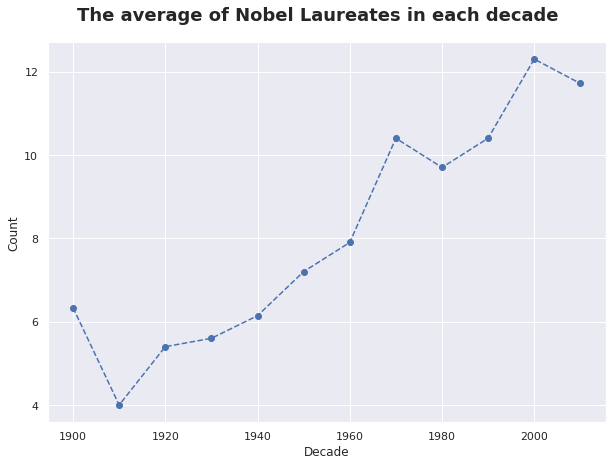

In [19]:
fig, ax = plt.subplots(figsize=[10, 7])
ax.plot(decade_count,'ob--')
ax.set(xlabel='Decade', ylabel='Count')
fig.suptitle('The average of Nobel Laureates in each decade', fontsize=18, fontweight='semibold', y=0.95);

We can conclude that there is an increasing trend from 1901 to 2011 (almost double). With only 1 nobel laureate in 1916 as the lowest number of nobel laureate, and fifteen nobel laureate in 2001 as the highest number of noble laureates.

### category

In [20]:
# display the head of this column
df['category'].head()

0     Chemistry
1    Literature
2      Medicine
3         Peace
4         Peace
Name: category, dtype: object

How many nobel categories are there?

In [21]:
print(df['category'].unique())

['Chemistry' 'Literature' 'Medicine' 'Peace' 'Physics' 'Economics']


There are 6 different categories, but how many nobel laureates in each categories?

In [22]:
df['category'].value_counts()

Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
Name: category, dtype: int64

We get 211 nobel laureates in Medicine and only 78 nobel laureates in Economics. Let's visualize the number we got above!

In [0]:
category_count = df['category'].value_counts()
category_fraction = df['category'].value_counts(normalize=True)

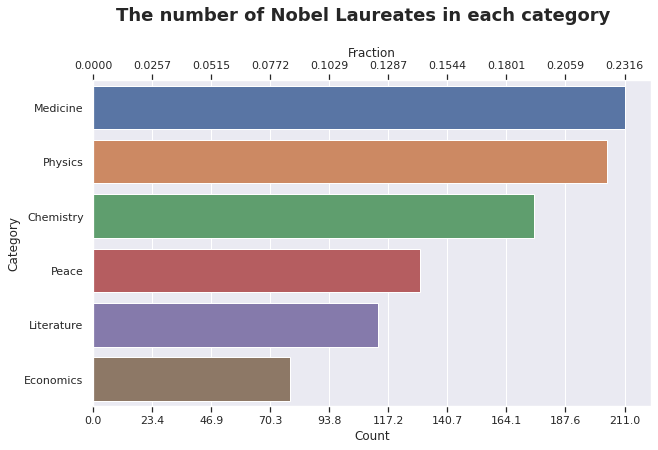

In [24]:
fig, ax_count = plt.subplots(figsize=[10, 6])
sns.barplot(ax=ax_count, x=category_count.values, y=category_count.index)
ax_count.set(xlabel='Count', ylabel='Category', xticks=np.linspace(0, category_count.max(), 10))
ax_fraction = ax_count.twiny()
sns.barplot(ax=ax_fraction, x=category_fraction.values, y=category_fraction.index)
ax_fraction.set(xlabel='Fraction', ylabel='Category', xticks=np.linspace(0, category_fraction.max(), 10))
fig.suptitle('The number of Nobel Laureates in each category', fontsize=18, fontweight='semibold', y=1.05);

For category column, we can conclude that Medicine (Physiology) is the field with highest number of nobel laureates and Economics is the lowest one. Medicine contributes to almost 25 percent of all nobel laureates.

### laureate_type

In [25]:
df['laureate_type'].head()

0    Individual
1    Individual
2    Individual
3    Individual
4    Individual
Name: laureate_type, dtype: object

In [26]:
# how many unique values in this column
df['laureate_type'].unique()

array(['Individual', 'Organization'], dtype=object)

So there are only individuals and Organizations. Let's see what it means...

In [27]:
df[df['laureate_type'] == 'Individual'].head(2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France


In [28]:
df[df['laureate_type'] == 'Organization'].head(2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In here we are wondering why there are quite a lot of missing values in birth_date, birth_city, sex, organization_name, and more. Probably one of the explanations is because if the data point represents an organization surely it doesn't have specific values for all those columns, for example an organization doesn't have birth date or sex. So we know now, why there are missing values in our dataset (surely there are another explanations). If our guess is right, then the number of missing values for sex is equal to the number of organization. Let's validate our guess.

How many nobel laureates as an individual and an organization?

In [29]:
df['laureate_type'].value_counts()

Individual      881
Organization     30
Name: laureate_type, dtype: int64

In [30]:
# find all data points with column laureate_type is Organization 
# and column sex is not null
df[(df['laureate_type'] == 'Organization') & (~df['sex'].isnull())]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
435,1973,Peace,The Nobel Peace Prize 1973,NaN,1/2,531,Organization,Le Duc Tho,1911-10-14,Nam Ha province,Vietnam,Male,NaN,NaN,NaN,1990-10-13,Hanoi,Vietnam
501,1979,Peace,The Nobel Peace Prize 1979,NaN,1/1,540,Organization,Mother Teresa,1910-08-26,Uskup (Skopje),Ottoman Empire (Republic of Macedonia),Female,NaN,NaN,NaN,1997-09-05,Calcutta,India
598,1989,Peace,The Nobel Peace Prize 1989,NaN,1/1,551,Organization,The 14th Dalai Lama (Tenzin Gyatso),1935-07-06,Taktser,Tibet (People's Republic of China),Male,NaN,NaN,NaN,NaT,NaN,NaN
618,1991,Peace,The Nobel Peace Prize 1991,"""for her non-violent struggle for democracy an...",1/1,553,Organization,Aung San Suu Kyi,1945-06-19,Rangoon (Yangon),Burma (Myanmar),Female,NaN,NaN,NaN,NaT,NaN,NaN


Above, we can see that data points with column laureate_type filled with Organization still have sex, because they are actually Individuals. There are two options when facing this obstacle, we believe the data as it is, or we can change it with caution. Right now, we will change it.

In [31]:
df.loc[(df['laureate_type'] == 'Organization') & (~df['sex'].isnull()), ['laureate_type']] = 'Individual'
print("Our alteration is correct if we got empty data frame: ", df.loc[(df['laureate_type'] == 'Organization') & (~df['sex'].isnull()), ['laureate_type']].isnull())

Our alteration is correct if we got empty data frame:  Empty DataFrame
Columns: [laureate_type]
Index: []


In [0]:
ltype_count = df['laureate_type'].value_counts()

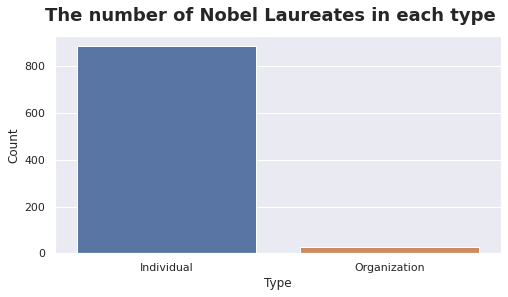

In [33]:
fig, ax = plt.subplots(figsize=[8, 4])
sns.barplot(ax=ax, x=ltype_count.index, y=ltype_count.values)
ax.set(xlabel='Type', ylabel='Count')
fig.suptitle('The number of Nobel Laureates in each type', fontsize=18, fontweight='semibold');

In here, we know one of the reasons why we have many missing values (due to Organization which doesn't have any specific value for a feature like sex or birth city. Also, individual nobel laureates out-numbered organization nobel laureates.

### sex

This is probably one of the most interesting column to explore, what is the percentage of male nobel laureates compare to female nobel laureates. Is it any imbalanced in here? So, let's explore it further!

In [34]:
df['sex'].head(5)

0    Male
1    Male
2    Male
3    Male
4    Male
Name: sex, dtype: object

In [35]:
df['sex'].tail(5)

906    Male
907    Male
908    Male
909    Male
910    Male
Name: sex, dtype: object

How the number told us about this column?

In [0]:
sex_count = df['sex'].value_counts()
sex_fraction = df['sex'].value_counts(normalize=True)

In [37]:
sex_count

Male      836
Female     49
Name: sex, dtype: int64

In [38]:
sex_fraction

Male      0.944633
Female    0.055367
Name: sex, dtype: float64

Certainly a large gap between male and female, almost 95% are males and 5% are females, and don't forget about the organization which we don't count in here. Before try to make any arguable arguments or conclusions, let's continue our exploration by visualizing the number we got above as a bar plot.

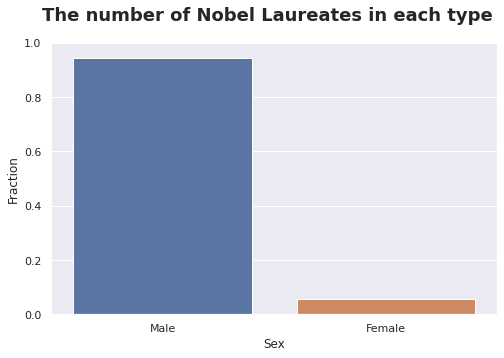

In [39]:
fig, ax = plt.subplots(figsize=[8, 5])
sns.barplot(ax=ax, x=sex_fraction.index, y=sex_fraction.values)
ax.set(xlabel='Sex', ylabel='Fraction', ylim=(0, 1))
fig.suptitle('The number of Nobel Laureates in each type', fontsize=18, fontweight='semibold');

Simple conclusion that we can make right now is there are more male than female nobel laureates, and the ratio between these two is quite high with almost 95% nobel laureates are males. But we will continue our exploratory data analysis before try to make any arguable conclusions.

### birth_country

First, we will look for how much null values in this column (reevaluate the result we have at the beginning of this section).

In [40]:
df['birth_country'].isnull().sum()

26

If we look back, we got the same number as the number of organization in this dataset (note that we have changed 4 data points with value Organization to Individual).

In [41]:
print("How many unique countries are there?", len(df['birth_country'].unique()))
df['birth_country'].unique()

How many unique countries are there? 122


array(['Netherlands', 'France', 'Prussia (Poland)', 'Switzerland',
       'Prussia (Germany)', 'Schleswig (Germany)', 'India', 'Sweden',
       'Norway', 'Faroe Islands (Denmark)', 'United Kingdom',
       'Russian Empire (Poland)', 'Scotland', 'Spain', 'Russia', nan,
       'Poland', 'Germany', 'Austrian Empire (Czech Republic)',
       'Hungary (Slovakia)', 'Tuscany (Italy)', 'Italy',
       'United States of America', 'Bavaria (Germany)',
       'British India (India)', 'Austrian Empire (Italy)', 'New Zealand',
       'East Friesland (Germany)', 'Russian Empire (Ukraine)', 'Denmark',
       'Luxembourg', 'Russian Empire (Latvia)', 'Belgium',
       'Hesse-Kassel (Germany)', 'Germany (Russia)',
       'Mecklenburg (Germany)', 'Austria', 'Prussia (Russia)',
       'Australia', 'Austria-Hungary (Slovenia)', 'Ireland', 'Canada',
       'Java, Dutch East Indies (Indonesia)', 'Austrian Empire (Austria)',
       'Germany (Poland)', 'W&uuml;rttemberg (Germany)', 'Argentina',
       'Austria

We have a lot of nobel laureates with different country, eventhough at the early time of nobel prize, mostly nobel laureates dominated by European countries. One of the reason for this diversity is how several countries have changed after World War I and World War II. To make our exploration simpler with losing important informations, we only care about the countries based on current situation, for example, West Germany will be considered as Germany and British India will be considered as Bangladesh.

In [0]:
# extract the current country name
def extract_country(country):
    match = re.search(r"\w*\((\w+\))", str(country))
    if match == None:
        return country
    else:
        return match.group()

In [0]:
# replace country name with current country name
df['birth_country'] = df['birth_country'].apply(extract_country).str.replace(r"[()]", '')

How many unique countires now?

In [44]:
print("How many unique countries now?", len(df['birth_country'].unique()))
df['birth_country'].unique()

How many unique countries now? 84


array(['Netherlands', 'France', 'Poland', 'Switzerland', 'Germany',
       'India', 'Sweden', 'Norway', 'Denmark', 'United Kingdom',
       'Scotland', 'Spain', 'Russia', nan,
       'Austrian Empire Czech Republic', 'Slovakia', 'Italy',
       'United States of America', 'New Zealand', 'Ukraine', 'Luxembourg',
       'Latvia', 'Belgium', 'Austria', 'Australia', 'Slovenia', 'Ireland',
       'Canada', 'Indonesia', 'Argentina', 'Hungary', 'Croatia',
       'Finland', 'Chile', 'Austria-Hungary Czech Republic', 'Portugal',
       'Japan', 'South Africa', 'Iceland', 'China', 'Algeria',
       'Guadeloupe Island', 'Brazil', 'Zimbabwe',
       'Bosnia Bosnia and Herzegovina', 'Azerbaijan', 'Turkey', 'Egypt',
       'Guatemala', 'Belarus', 'Vietnam', 'Romania',
       'Austria-Hungary Bosnia and Herzegovina', 'Northern Ireland',
       'Lithuania', 'British West Indies Saint Lucia', 'Greece',
       'Ottoman Empire Republic of Macedonia', 'Pakistan', 'Venezuela',
       'Bulgaria', 'Colombia'

In here we decrease the number from 122 to 84, quite significant. Now, we will count how many nobel laureates in each country.

In [45]:
df['birth_country'].value_counts()

United States of America    259
United Kingdom               85
Germany                      80
France                       54
Sweden                       29
                           ... 
Yemen                         1
Taiwan                        1
Greece                        1
Vietnam                       1
Guadeloupe Island             1
Name: birth_country, Length: 83, dtype: int64

We will chop the number down, so we just focus on countries with the number of nobel laureates greater than 10 and normalize it so we can easily understand the relative ratio.

In [46]:
birth_country_fraction = df['birth_country'].value_counts(normalize=True)[df['birth_country'].value_counts() >= 10]
birth_country_fraction

United States of America    0.292655
United Kingdom              0.096045
Germany                     0.090395
France                      0.061017
Sweden                      0.032768
Poland                      0.029379
Russia                      0.029379
Japan                       0.027119
Italy                       0.021469
Netherlands                 0.020339
Canada                      0.020339
Austria                     0.019209
Switzerland                 0.018079
Denmark                     0.013559
Norway                      0.013559
China                       0.012429
Australia                   0.011299
Name: birth_country, dtype: float64

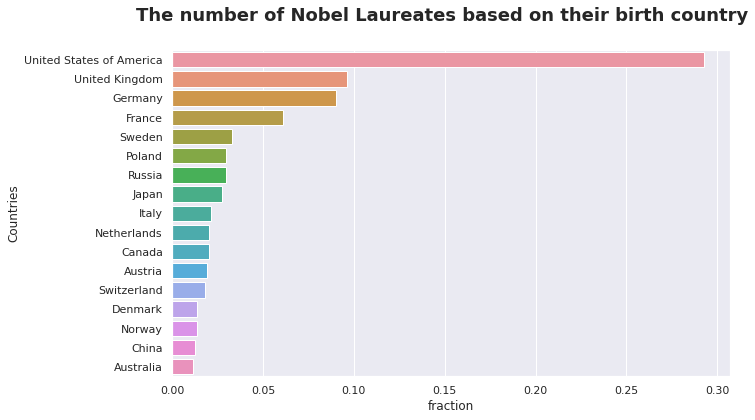

In [47]:
fig, ax_fraction = plt.subplots(figsize=[10, 6])
sns.barplot(ax=ax_fraction, x=birth_country_fraction.values, y=birth_country_fraction.index)
ax_fraction.set(xlabel='fraction', ylabel='Countries')
fig.suptitle('The number of Nobel Laureates based on their birth country', fontsize=18, fontweight='semibold');

More than 25% of nobel laureates are born in USA. But are they also died in the same Country? We will find out later.

### death_country

First, we will look for how much null values in this column (reevaluate the result we have at the beginning of this section).

In [48]:
df['death_country'].isnull().sum()

329

Okay, so we have a larger number than what we have when evaluate birth_country. One of the reason probably, a lot of nobel laureates are still alive, atleast until 2016 (the last data point we have). Let's validate our hypothesis by taking 3 samples and validate it using the best friend of us, Google.

In [49]:
df[df['death_country'].isnull()].sample(n=3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
815,2008,Physics,The Nobel Prize in Physics 2008,"""for the discovery of the origin of the broken...",1/4,828,Individual,Toshihide Maskawa,1940-02-07,Nagoya,Japan,Male,Kyoto Sangyo University,Kyoto,Japan,NaT,NaN,NaN
564,1986,Literature,The Nobel Prize in Literature 1986,"""who in a wide cultural perspective and with p...",1/1,663,Individual,Wole Soyinka,1934-07-13,Abeokuta,Nigeria,Male,NaN,NaN,NaN,NaT,NaN,NaN
810,2008,Medicine,The Nobel Prize in Physiology or Medicine 2008,"""for their discovery of human immunodeficiency...",1/4,824,Individual,Françoise Barré-Sinoussi,1947-07-30,Paris,France,Female,"Regulation of Retroviral Infections Unit, Viro...",Paris,France,NaT,NaN,NaN


First, Sir Peter Mansfield died in 2017. Second, Robert J. Lefkowitz is still alive up to now (in 2020), lastly Serge Haroche is still alive up to now. So, our hypothesis better likely right. (I make a strong assumption by doing this to make the exploration simpler)

Let's see how many unique values in this column

In [50]:
print("How many unique countries (death_country)?", len(df['death_country'].unique()))
df['death_country'].unique()

How many unique countries (death_country)? 51


array(['Germany', 'France', 'Switzerland', 'United Kingdom',
       'Netherlands', 'Sweden', 'Denmark', 'Spain', 'Russia', nan,
       'Austria', 'Italy', 'United States of America', 'Romania',
       'Germany (Poland)', 'India', 'Belgium', 'West Germany (Germany)',
       'Scotland', 'Norway', 'Canada', 'Poland', 'East Germany',
       'Tunisia', 'Argentina', 'Finland', 'Ireland', 'Portugal', 'Japan',
       'Jamaica', 'Northern Ireland', 'Gabon', 'Iceland',
       'Union of Soviet Socialist Republics', 'Puerto Rico',
       'Union of Soviet Socialist Republics (Russia)', 'Czechoslovakia',
       'Australia', 'South Africa', 'Yugoslavia (Serbia)',
       'Northern Rhodesia (Zambia)', 'Greece', 'Israel', 'Chile',
       'Vietnam', 'Egypt', 'Barbados', 'Mexico', 'Hungary', 'Kenya',
       'Philippines'], dtype=object)

Just as the process we performed before, we only care about the current name of certain countries. Then let's parse the string.

In [0]:
# replace country name with current country name
df['death_country'] = df['death_country'].apply(extract_country).str.replace(r"[()]", '')

In [52]:
print("How many unique countries (death_country)? now", len(df['death_country'].unique()))
df['death_country'].unique()

How many unique countries (death_country)? now 48


array(['Germany', 'France', 'Switzerland', 'United Kingdom',
       'Netherlands', 'Sweden', 'Denmark', 'Spain', 'Russia', nan,
       'Austria', 'Italy', 'United States of America', 'Romania',
       'Poland', 'India', 'Belgium', 'Scotland', 'Norway', 'Canada',
       'East Germany', 'Tunisia', 'Argentina', 'Finland', 'Ireland',
       'Portugal', 'Japan', 'Jamaica', 'Northern Ireland', 'Gabon',
       'Iceland', 'Union of Soviet Socialist Republics', 'Puerto Rico',
       'Czechoslovakia', 'Australia', 'South Africa', 'Serbia', 'Zambia',
       'Greece', 'Israel', 'Chile', 'Vietnam', 'Egypt', 'Barbados',
       'Mexico', 'Hungary', 'Kenya', 'Philippines'], dtype=object)

From 51 to 48 different countries. Now, we will count the number of nobel laureates that died in each country.

In [53]:
df['death_country'].value_counts()

United States of America               203
United Kingdom                          73
Germany                                 55
France                                  51
Sweden                                  28
Switzerland                             26
Italy                                   14
Russia                                  11
Spain                                   10
Netherlands                              9
Denmark                                  9
Norway                                   8
Belgium                                  7
Canada                                   6
Austria                                  6
Japan                                    6
Poland                                   5
Scotland                                 5
Argentina                                4
Israel                                   4
India                                    3
South Africa                             3
Union of Soviet Socialist Republics      3
Ireland    

Just like the colum birth_country, let's focus on country with value greater than 10.

In [54]:
death_country_fraction = df['death_country'].value_counts(normalize=True)[df['death_country'].value_counts() >= 10]
death_country_fraction

United States of America    0.348797
United Kingdom              0.125430
Germany                     0.094502
France                      0.087629
Sweden                      0.048110
Switzerland                 0.044674
Italy                       0.024055
Russia                      0.018900
Spain                       0.017182
Name: death_country, dtype: float64

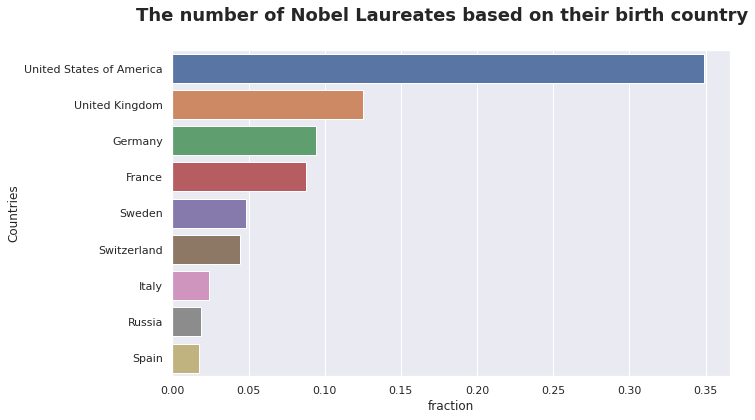

In [55]:
fig, ax_fraction = plt.subplots(figsize=[10, 6])
sns.barplot(ax=ax_fraction, x=death_country_fraction.values, y=death_country_fraction.index)
ax_fraction.set(xlabel='fraction', ylabel='Countries')
fig.suptitle('The number of Nobel Laureates based on their birth country', fontsize=18, fontweight='semibold');

USA takes the first place again with 34% nobel laureates died in here.

### diff_birth_death_country

This column will be the new column we introduce that represents is certain nobel laureate changed their citizenship or moved to another country. If we take an example, Albert Einstein born in Germany and decided to move to USA, because of the condition in Germany at that time (since he was a Jew). Are there any same cases like Einstein? Let's figure it out...

We will only take nobel laureates that have died, and leave the alive undisturbed.

In [56]:
dead_nobel_laureates = df[~df['death_country'].isnull()]
dead_nobel_laureates.head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


In [57]:
dead_nobel_laureates[dead_nobel_laureates['birth_country'] != dead_nobel_laureates['death_country']].head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom


In [58]:
# how many nobel laureates have moved from their birth country to a new country up until their death
moved = dead_nobel_laureates[dead_nobel_laureates['birth_country'] != dead_nobel_laureates['death_country']].shape[0]
print('Moved nobel laureates: ', moved)

Moved nobel laureates:  191


In [59]:
# total nobel laureates that have died
dead_nobel_laureates.shape[0]

582

191 nobel laureates have moved from total 582. Certainly not a small number, let's visualize it

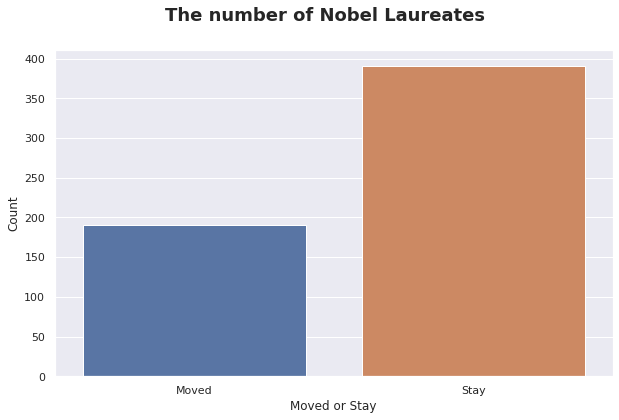

In [60]:
fig, ax = plt.subplots(figsize=[10, 6])
sns.barplot(ax=ax, x=['Moved', 'Stay'], y=[191, 582-191])
ax.set(xlabel='Moved or Stay', ylabel='Count')
fig.suptitle('The number of Nobel Laureates', fontsize=18, fontweight='semibold');

Almost half of nobel laureates have moved from their birth country, why? Many reasons behind it, and I think one of them must be due to World War I and World War II.

### birth_date

In this column, we'll only care about the year. Then, we'll create a new column called birth_year.

In [0]:
# take birth_date column to birth_year an impute missing values as -1
df['birth_year'] = df['birth_date'].dt.year.fillna(-1).astype('int')

In [62]:
# display top 5
df['birth_year'].head()

0    1852
1    1839
2    1854
3    1828
4    1822
Name: birth_year, dtype: int64

In [63]:
df['birth_year'].value_counts()

-1       28
 1918    23
 1911    17
 1943    16
 1927    15
         ..
 1958     1
 1956     1
 1847     1
 1849     1
 1997     1
Name: birth_year, Length: 139, dtype: int64

There are 28 missing values (encoded as -1), and 1918 become the golden year because 23 nobel laureates born in this year. We'll take top 10 of this result (excluding the missing values).

In [64]:
birth_year_count = df['birth_year'].value_counts()[1:12]
birth_year_count

1918    23
1911    17
1943    16
1927    15
1940    15
1941    14
1929    14
1930    14
1931    14
1936    14
1917    13
Name: birth_year, dtype: object

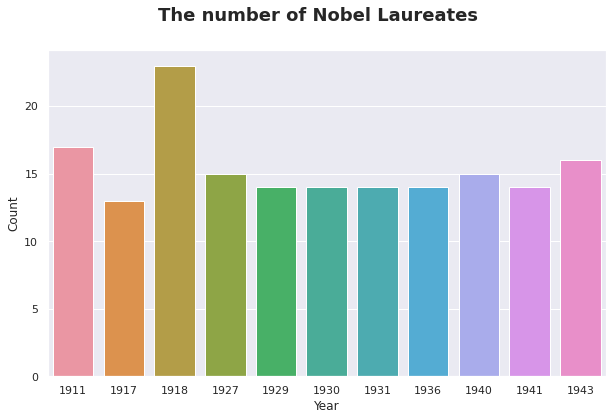

In [65]:
fig, ax = plt.subplots(figsize=[10, 6])
sns.barplot(ax=ax, x=birth_year_count.index, y=birth_year_count.values)
ax.set(xlabel='Year', ylabel='Count')
fig.suptitle('The number of Nobel Laureates', fontsize=18, fontweight='semibold');

### death_date

We will perform the same analysis as birth_date column.

In [66]:
# take death_date column to death_year an impute missing values as -1
df['death_year'] = df['death_date'].dt.year.fillna(-1).astype('int')

# display top 5
df['death_year'].head()

0    1911
1    1907
2    1917
3    1910
4    1912
Name: death_year, dtype: int64

In [68]:
df['death_year'].value_counts()

-1       318
 2013     19
 2016     12
 2004     12
 2011     12
        ... 
 1933      1
 1939      1
 1904      1
 1903      1
 1946      1
Name: death_year, Length: 112, dtype: int64

In [69]:
death_year_count = df['death_year'].value_counts()[1:12]
death_year_count

2013    19
2016    12
2004    12
2011    12
1994    11
1991    11
1998    11
2015    11
1995    10
1971    10
2009     9
Name: death_year, dtype: int64

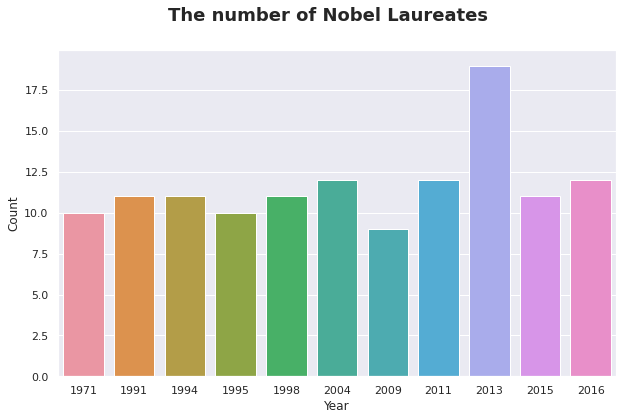

In [70]:
fig, ax = plt.subplots(figsize=[10, 6])
sns.barplot(ax=ax, x=death_year_count.index, y=death_year_count.values)
ax.set(xlabel='Year', ylabel='Count')
fig.suptitle('The number of Nobel Laureates', fontsize=18, fontweight='semibold');

Based on the information we got, 2013 become the loss year, because 19 nobel laureates died this year. But up to 2016, 318 nobel laureates are still alive (we assume missing values as still alive).